In [ ]:
#Question: What, If Any, Correlation Can we Find between Gender diversity (And Racial if We can Find the data set!) and Box Office Success? Is it even a top variable?

In [ ]:
#Data from GitHub AND BoxOfficeMoJo

In [25]:
#Importing Packages
import bs4
from bs4 import BeautifulSoup as bs
import requests
from requests import get
import pandas as pd
import seaborn as sns
import numpy as np 
import statsmodels.api as sm
import sklearn
import csv


In [ ]:
##First Collecting Data on Actor, Producer, and Director Gender Diversity from Database from GitHub for Movies Released 2000-2018.
#Thanks to User taubergm- they housed data sources for Gender Diversity. I was linked to these datasets from a study I read to understand how others have thought of this project with this project: "Gender Representation in the Film Industry" by Sarah Cassway, Alexa Solomon, Caroline Walton

In [5]:
#Actor URL = "https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_actors_movies_gender_gold.csv"

"year","name","country","budget","gross","runtime","starring","language","released","gender"
"2000",


AttributeError: 'str' object has no attribute 'shape'

In [12]:
actordf  = pd.read_clipboard(sep=",")

In [201]:
actordf.shape
actordf.head()

,year,name,starring,actor_gender
0,2000,Mission: Impossible 2,Tom Cruise,male
1,2000,Mission: Impossible 2,Dougray Scott,male
2,2000,Mission: Impossible 2,Thandie Newton,female
3,2000,Mission: Impossible 2,Richard Roxburgh,male
4,2000,Mission: Impossible 2,John Polson,male


In [26]:
actordf = actordf[['year','name','country','runtime','starring','language','gender']]

In [55]:
print(actordf.shape)
actordf.head()

(20371, 4)


,year,name,starring,actor_gender
0,2000,Mission: Impossible 2,Tom Cruise,male
1,2000,Mission: Impossible 2,Dougray Scott,male
2,2000,Mission: Impossible 2,Thandie Newton,female
3,2000,Mission: Impossible 2,Richard Roxburgh,male
4,2000,Mission: Impossible 2,John Polson,male


In [39]:
actordf=actordf.rename(columns = {'actorgender':'actor_gender'})

In [43]:
actordf = actordf[['year','name','starring','actor_gender']]

In [ ]:
#Director URL = https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_directors_gender.csv

In [14]:
directordf  = pd.read_clipboard(sep=",")

In [59]:
print(directordf.shape)
directordf.head()

(5056, 7)


,year,name,country,runtime,director,language,director_gender
0,2000,Mission: Impossible 2,['United States'],123,John Woo,['English'],male
1,2000,Gladiator,"['United Kingdom', 'United States']",155,Ridley Scott,['English'],male
2,2000,Cast Away,['United States'],143,Robert Zemeckis,['English'],male
3,2000,What Women Want,['United States'],127,Nancy Meyers,['English'],female
4,2000,Dinosaur,['United States'],82,Ralph Zondag,['English'],male


In [45]:
directordf = directordf[['year','name','country','runtime','director','language','gender']]

In [47]:
directordf=directordf.rename(columns = {'gender':'director_gender'})

In [58]:
directordf2 = directordf.drop_duplicates(subset = ["name"])

In [60]:
print(directordf2.shape)
directordf2.head()

(4192, 7)


,year,name,country,runtime,director,language,director_gender
0,2000,Mission: Impossible 2,['United States'],123,John Woo,['English'],male
1,2000,Gladiator,"['United Kingdom', 'United States']",155,Ridley Scott,['English'],male
2,2000,Cast Away,['United States'],143,Robert Zemeckis,['English'],male
3,2000,What Women Want,['United States'],127,Nancy Meyers,['English'],female
4,2000,Dinosaur,['United States'],82,Ralph Zondag,['English'],male


In [56]:
testdf = actordf.drop_duplicates(subset = ["name"])

In [64]:
testdf = testdf[['name','starring','actor_gender']]

In [57]:
print(testdf.shape)
testdf.head()

(3323, 4)


,year,name,starring,actor_gender
0,2000,Mission: Impossible 2,Tom Cruise,male
8,2000,Gladiator,Russell Crowe,male
15,2000,Cast Away,Tom Hanks,male
18,2000,What Women Want,Mel Gibson,male
24,2000,Dinosaur,D. B. Sweeney,male


In [ ]:
#FirstMergedGenderData

In [65]:
dfGender = pd.merge(directordf2, testdf, on='name')

In [66]:
print(dfGender.shape)
dfGender.head()

(3322, 9)


,year,name,country,runtime,director,language,director_gender,starring,actor_gender
0,2000,Mission: Impossible 2,['United States'],123,John Woo,['English'],male,Tom Cruise,male
1,2000,Gladiator,"['United Kingdom', 'United States']",155,Ridley Scott,['English'],male,Russell Crowe,male
2,2000,Cast Away,['United States'],143,Robert Zemeckis,['English'],male,Tom Hanks,male
3,2000,What Women Want,['United States'],127,Nancy Meyers,['English'],female,Mel Gibson,male
4,2000,Dinosaur,['United States'],82,Ralph Zondag,['English'],male,D. B. Sweeney,male


In [ ]:
#Producer URL = https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_producers_gender_gold.csv

In [18]:
producerdf = pd.read_clipboard(sep=",")

In [202]:
print(producerdf.shape)
producerdf.head()

(12419, 10)


,year,name,country,budget,gross,runtime,producer,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,Tom Cruise,['English'],2000/05/24,male
1,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,Paula Wagner,['English'],2000/05/24,female
2,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,Douglas Wick,['English'],2000/05/01,male
3,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,David Franzoni,['English'],2000/05/01,male
4,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,Branko Lustig,['English'],2000/05/01,male


In [203]:
ReleasedDatedf = producerdf[['name','released']]

In [205]:
ReleasedDatedf = ReleasedDatedf.drop_duplicates(subset = ["name"])

In [206]:
ReleasedDatedf.head()

,name,released
0,Mission: Impossible 2,2000/05/24
2,Gladiator,2000/05/01
5,Cast Away,2000/12/22
9,What Women Want,2000/12/15
15,Dinosaur,2000/5/19


In [69]:
producerdf2=producerdf.rename(columns = {'gender':'producer_gender'})
producerdf2 = producerdf2[['name','producer','producer_gender']]
producerdf2 = producerdf2.drop_duplicates(subset = ["name"])
print(producerdf2.shape)
producerdf2.head()

(4192, 3)


,name,producer,producer_gender
0,Mission: Impossible 2,Tom Cruise,male
2,Gladiator,Douglas Wick,male
5,Cast Away,Tom Hanks,male
9,What Women Want,Susan Cartsonis,female
15,Dinosaur,Pam Marsden,female


In [70]:
dfGender = pd.merge(dfGender, producerdf2, on='name')

In [71]:
print(dfGender.shape)
dfGender.head()

(3322, 11)


,year,name,country,runtime,director,language,director_gender,starring,actor_gender,producer,producer_gender
0,2000,Mission: Impossible 2,['United States'],123,John Woo,['English'],male,Tom Cruise,male,Tom Cruise,male
1,2000,Gladiator,"['United Kingdom', 'United States']",155,Ridley Scott,['English'],male,Russell Crowe,male,Douglas Wick,male
2,2000,Cast Away,['United States'],143,Robert Zemeckis,['English'],male,Tom Hanks,male,Tom Hanks,male
3,2000,What Women Want,['United States'],127,Nancy Meyers,['English'],female,Mel Gibson,male,Susan Cartsonis,female
4,2000,Dinosaur,['United States'],82,Ralph Zondag,['English'],male,D. B. Sweeney,male,Pam Marsden,female


In [ ]:
#Writer URL = https://raw.githubusercontent.com/taubergm/HollywoodGenderData/master/all_writers_gender.csv

In [21]:
writerdf = pd.read_clipboard(sep=",")

In [22]:
writerdf.shape
writerdf.head()

,year,name,country,budget,gross,runtime,writer,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,NaN,['English'],2000/05/24,unknown
1,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,NaN,['English'],2000/05/01,unknown
2,2000,Cast Away,['United States'],90000000,429600000,143,William Broyles,['English'],2000/12/22,male
3,2000,Cast Away,['United States'],90000000,429600000,143,Jr.,['English'],2000/12/22,unknown
4,2000,What Women Want,['United States'],70000000,374100000,127,Josh Goldsmith,['English'],2000/12/15,male


In [73]:
writerdf2=writerdf.rename(columns = {'gender':'writer_gender'})
writerdf2 = writerdf2[['name','writer','writer_gender']]
writerdf2 = writerdf2.drop_duplicates(subset = ["name"])
print(writerdf2.shape)
writerdf2.head()

(4191, 3)


,name,writer,writer_gender
0,Mission: Impossible 2,NaN,unknown
1,Gladiator,NaN,unknown
2,Cast Away,William Broyles,male
4,What Women Want,Josh Goldsmith,male
7,Dinosaur,NaN,unknown


In [74]:
dfGender = pd.merge(dfGender, writerdf2, on='name')

In [207]:
dfGender = pd.merge(dfGender, ReleasedDatedf, on='name')

In [208]:
print(dfGender.shape)
dfGender.head()

(3321, 14)


,year,name,country,runtime,director,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released
0,2000,Mission: Impossible 2,['United States'],123,John Woo,['English'],male,Tom Cruise,male,Tom Cruise,male,NaN,unknown,2000/05/24
1,2000,Gladiator,"['United Kingdom', 'United States']",155,Ridley Scott,['English'],male,Russell Crowe,male,Douglas Wick,male,NaN,unknown,2000/05/01
2,2000,Cast Away,['United States'],143,Robert Zemeckis,['English'],male,Tom Hanks,male,Tom Hanks,male,William Broyles,male,2000/12/22
3,2000,What Women Want,['United States'],127,Nancy Meyers,['English'],female,Mel Gibson,male,Susan Cartsonis,female,Josh Goldsmith,male,2000/12/15
4,2000,Dinosaur,['United States'],82,Ralph Zondag,['English'],male,D. B. Sweeney,male,Pam Marsden,female,NaN,unknown,2000/5/19


In [209]:
dfGender.to_csv('dfGender.csv')

In [ ]:
##While I can clearly see that domestic gross and Budget are already 
##in my analysis list, for the sake of the project I will be removing these in joining and subsetting this data and pretending 
##that this is info that is needed from boxofficemojo!

In [99]:
movielinks2 = getmovielinks(url_list1)

In [7]:
url_list2 = ['https://www.boxofficemojo.com/year/2008/?grossesOption=totalGrosses',
             'https://www.boxofficemojo.com/year/2009/?grossesOption=totalGrosses',
             'https://www.boxofficemojo.com/year/2010/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2011/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2012/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2013/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2014/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2015/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2016/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2017/?grossesOption=totalGrosses',
            'https://www.boxofficemojo.com/year/2018/?grossesOption=totalGrosses'
            ]

def getmovielinks(url_list):
    movie_links=[]
    for url in url_list:
        response=requests.get(url)
        soup_movie=bs(response.text, 'lxml')
        #grab movie links
        for x in soup_movie.find_all('a', class_='a-link-normal'):
            movie_links.append(x.get('href')) 
    
    return movie_links


In [8]:
movielinks = getmovielinks(url_list2)

In [9]:
movielinks

['/?ref_=bo_nb_yld_mojologo',
 'https://pro.imdb.com/login/ap?u=%2Flogin%2Flwa&imdbPageAction=signUp&ref_=mojo_nb_yld_rollover&rf=mojo_nb_yld_rollover',
 'https://www.facebook.com/BoxOfficeMojo/',
 'https://twitter.com/boxofficemojo',
 '/date/?ref_=bo_nb_yld_tab',
 '/intl/?ref_=bo_nb_yld_tab',
 '/year/world/?ref_=bo_nb_yld_tab',
 '/calendar/?ref_=bo_nb_yld_tab',
 '/charts/overall/?ref_=bo_nb_yld_tab',
 '/showdown/?ref_=bo_nb_yld_tab',
 '/brand/?ref_=bo_nb_yld_tab',
 '/date/?ref_=bo_nb_yld_secondarytab',
 '/weekend/?ref_=bo_nb_yld_secondarytab',
 '/weekly/?ref_=bo_nb_yld_secondarytab',
 '/month/?ref_=bo_nb_yld_secondarytab',
 '/quarter/?ref_=bo_nb_yld_secondarytab',
 '/year/?ref_=bo_nb_yld_secondarytab',
 '/season/?ref_=bo_nb_yld_secondarytab',
 '/holiday/?ref_=bo_nb_yld_secondarytab',
 '?grossesOption=totalGrosses&sort=rank&ref_=bo_yld__resort#table',
 '?grossesOption=totalGrosses&sort=grossToDate&ref_=bo_yld__resort#table',
 '?grossesOption=totalGrosses&sort=maxNumTheaters&ref_=bo_yld

In [10]:
movie_urls=[]
def mojomovies(movielinks):
    for link in movielinks:
        if "release/" in link:
            final='https://www.boxofficemojo.com'+link
            movie_urls.append(final)
            
    return movie_urls

In [11]:
movie_urls=mojomovies(movielinks)

In [12]:
movie_urls

['https://www.boxofficemojo.com/release/rl3729098241/?ref_=bo_yld_table_1',
 'https://www.boxofficemojo.com/release/rl1482327553/?ref_=bo_yld_table_2',
 'https://www.boxofficemojo.com/release/rl2321253889/?ref_=bo_yld_table_3',
 'https://www.boxofficemojo.com/release/rl746030593/?ref_=bo_yld_table_4',
 'https://www.boxofficemojo.com/release/rl3615065601/?ref_=bo_yld_table_5',
 'https://www.boxofficemojo.com/release/rl3562833409/?ref_=bo_yld_table_6',
 'https://www.boxofficemojo.com/release/rl58099201/?ref_=bo_yld_table_7',
 'https://www.boxofficemojo.com/release/rl1382057473/?ref_=bo_yld_table_8',
 'https://www.boxofficemojo.com/release/rl3445261825/?ref_=bo_yld_table_9',
 'https://www.boxofficemojo.com/release/rl509117953/?ref_=bo_yld_table_10',
 'https://www.boxofficemojo.com/release/rl3211691521/?ref_=bo_yld_table_11',
 'https://www.boxofficemojo.com/release/rl240616961/?ref_=bo_yld_table_12',
 'https://www.boxofficemojo.com/release/rl3697313281/?ref_=bo_yld_table_13',
 'https://www

In [584]:
### Thanks to Github User sodas32- wrote much of this myself, but as we were both pulling from boxofficemojo() using different pages of the site) refrenced the previous code to check myself and to trouble shoot 
import random

def movie_info(movies): 
    Titles=[]
    Domestic_Gr=[]
    Inter_Gr=[]
    World_Gr=[]
    Budget=[]
    Rel_Date=[]
    Opn_Gr=[]
    Genre=[]
    Wid_Rel=[]
    Len_Rel=[]
    Rating=[]
    
    for i in movies:       
        response = requests.get(i)
        page = response.text
        soup = bs(page, "lxml")
    
        #Title
        try:  
            title=soup.find('h1', class_='a-size-extra-large').text
            Titles.append(title)
        except Exception as error:
            Titles.append(np.nan) 
        #Domestic Gross             
        try:
            domestic_gross=soup.find('span', class_='a-size-medium a-text-bold').text.split()[0]
            Domestic_Gr.append(domestic_gross)
        except Exception as error:
            Domestic_Gr.append(np.nan)
        #International Gross
        try:
            int_gross=soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            Inter_Gr.append(int_gross)
        except Exception as error:
            Inter_Gr.append(np.nan)
        #Worldwidegross
        try: 
            worldwide = soup.find('span', class_='a-size-small').find_next('span', class_='a-size-small').find_next('span', class_='money').find_next('span', class_='a-size-small').find_next('span', class_='money').text
            World_Gr.append(worldwide)
        except Exception as error:
            World_Gr.append(np.nan)
        #Budget
        try:
            budget = soup.find('span', text = 'Budget').find_next('span', class_='money').text
            Budget.append(budget)
        except Exception as error:
            Budget.append(np.nan) 
        #Release Date
        try:
            release_date=soup.find('span', text = 'Release Date').find_next('span').text
            Rel_Date.append(release_date)
        except Exception as error:
            Rel_Date.append(np.nan)
        #Opening   
        try:
            opening=soup.find('span', text = 'Opening').find_next('span').text
            Opn_Gr.append(opening)
        except Exception as error:
            Opn_Gr.append(np.nan)             
        #Genre
        try:
            genre=soup.find('span', text = 'Genres').find_next('span').text
            Genre.append(genre)
        except Exception as error:
            Genre.append(np.nan)  
        #Widest Release
        try:
            widestrelease=soup.find('span', text = 'Widest Release').find_next('span').text
            Wid_Rel.append(widestrelease)
        except Exception as error:
             Wid_Rel.append(np.nan)
        #Length of Release
        try:
            lengthrelease=soup.find('span', text = 'In Release').find_next('span').text
            Len_Rel.append(lengthrelease)
        except Exception as error:
             Len_Rel.append(np.nan)     
        #Rating
        try: 
            rating=soup.find('span', text = 'MPAA').find_next('span').text
            Rating.append(rating)
        except Exception as error:
            Rating.append(np.nan)

        
    movies_dict={'Title':Titles,'Domestic_Gr':Domestic_Gr, 'Inter_Gr':Inter_Gr,'World_Gr':World_Gr,
                 'Budget':Budget,'Rel_Date':Rel_Date, 'Opn_Gr': Opn_Gr,'Genre':Genre,'WidestRelase':Wid_Rel,'Length_Relase':Len_Rel,'Rating':Rating}
        
    movies_data=pd.DataFrame(movies_dict)
    
    return movies_data

In [131]:
df2=movie_info(movie_urls)

In [132]:

print(df2.shape)

(2200, 11)


In [133]:
df2.head()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,Rating
0,The Dark Knight,"$533,345,358","$469,700,000","$1,003,045,358","$185,000,000","Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,PG-13
1,Iron Man,"$318,604,126","$266,762,121","$585,366,247","$140,000,000","May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,PG-13
2,Indiana Jones and the Kingdom of the Crystal S...,"$317,101,119","$473,552,823","$790,653,942","$185,000,000","May 22, 2008\n -\n Oct 1...","$100,137,8354,260\n theaters",Action\n \n Adventure,"4,264 theaters",224 days/32 weeks,PG-13
3,Hancock,"$227,946,274","$401,497,154","$629,443,428","$150,000,000","Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,PG-13
4,WALL·E,"$223,808,164","$297,503,696","$521,311,860","$180,000,000","Jun 27, 2008\n -\n Jan 8...","$63,087,5263,992\n theaters",Adventure\n \n Animation\n \n ...,"3,992 theaters",553 days/79 weeks,NaN


In [134]:

df2.to_csv('AllMovies.csv')

In [281]:
#Moviesdf = pd.concat([movies08,movies09,movies10,movies11,movies12,movies13,movies14,movies15,movies16,movies17,movies18], axis=0)

In [135]:
df2.columns

Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date',
       'Opn_Gr', 'Genre', 'WidestRelase', 'Length_Relase', 'Rating'],
      dtype='object')

In [285]:
#df2=df2.fillna(0)


In [284]:
Moviesdf.columns

Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date',
       'Genre', 'WidestRelase', 'Rating'],
      dtype='object')

In [136]:
dfGender = pd.read_csv("dfGender.csv")

In [137]:
dfGender.head()
print(dfGender.shape)
dfGender.columns

(3321, 15)


Index(['Unnamed: 0', 'year', 'name', 'country', 'runtime', 'director',
       'language', 'director_gender', 'starring', 'actor_gender', 'producer',
       'producer_gender', 'writer', 'writer_gender', 'released'],
      dtype='object')

In [138]:
dfGender=dfGender.drop(['Unnamed: 0'], axis=1 )

In [139]:
dfGender.columns

Index(['year', 'name', 'country', 'runtime', 'director', 'language',
       'director_gender', 'starring', 'actor_gender', 'producer',
       'producer_gender', 'writer', 'writer_gender', 'released'],
      dtype='object')

In [140]:
df = pd.merge(df2, dfGender, left_on="Title", right_on="name")
#save JIC
#df.to_csv('dfnew.csv')

In [142]:
df.to_csv('dfnew.csv')

In [143]:
df.head()
print(df.shape)
df.columns

(1510, 25)


Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date',
       'Opn_Gr', 'Genre', 'WidestRelase', 'Length_Relase', 'Rating', 'year',
       'name', 'country', 'runtime', 'director', 'language', 'director_gender',
       'starring', 'actor_gender', 'producer', 'producer_gender', 'writer',
       'writer_gender', 'released'],
      dtype='object')

In [36]:
df.to_csv('dfnew.csv')

In [309]:
df.head()
print(df.shape)
df.columns

(1510, 23)


Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date',
       'Genre', 'WidestRelase', 'Rating', 'year', 'name', 'country', 'runtime',
       'director', 'language', 'director_gender', 'starring', 'actor_gender',
       'producer', 'producer_gender', 'writer', 'writer_gender', 'released'],
      dtype='object')

In [37]:
df.head()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Rating,...,director,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released
0,The Dark Knight,"$533,345,358","$469,700,000","$1,003,045,358","$185,000,000","Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",PG-13,...,Christopher Nolan,['English'],male,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14
1,The Dark Knight,"$1,513,086","$1,513,086",NaN,"$185,000,000","Jul 19, 2012\n -\n Jul 1...",NaN,Action\n \n Crime\n \n Dra...,NaN,PG-13,...,Christopher Nolan,['English'],male,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14
2,Iron Man,"$318,604,126","$266,762,121","$585,366,247","$140,000,000","May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",PG-13,...,Jon Favreau,['English'],male,Robert Downey Jr.,male,Avi Arad,male,NaN,unknown,2008/4/14
3,Hancock,"$227,946,274","$401,497,154","$629,443,428","$150,000,000","Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",PG-13,...,Peter Berg,['English'],male,Will Smith,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16
4,Kung Fu Panda,"$215,434,591","$416,309,969","$631,744,560","$130,000,000","Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",PG,...,John Stevenson,['English'],male,Jack Black,male,Melissa Cobb,female,NaN,unknown,2008/5/15


In [144]:
#Droping Duplicates - This will only save the "Top Billed" Entries
df2 = df.drop_duplicates(subset = ["Title"])


In [145]:
df2.head()
print(df2.shape)
df2.columns
##Only 7 Dropped

(1503, 25)


Index(['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date',
       'Opn_Gr', 'Genre', 'WidestRelase', 'Length_Relase', 'Rating', 'year',
       'name', 'country', 'runtime', 'director', 'language', 'director_gender',
       'starring', 'actor_gender', 'producer', 'producer_gender', 'writer',
       'writer_gender', 'released'],
      dtype='object')

In [146]:
df2[df2.columns[1:5]] = df2[df2.columns[1:5]].replace('[\$,]', '', regex=True).astype(float)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [147]:
df2.columns[1:5]

Index(['Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget'], dtype='object')

In [148]:
df2.head()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,director,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,Christopher Nolan,['English'],male,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,Jon Favreau,['English'],male,Robert Downey Jr.,male,Avi Arad,male,NaN,unknown,2008/4/14
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,Peter Berg,['English'],male,Will Smith,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,John Stevenson,['English'],male,Jack Black,male,Melissa Cobb,female,NaN,unknown,2008/5/15
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,Catherine Hardwicke,['English'],female,Kristen Stewart,female,Wyck Godfrey,male,NaN,unknown,2008/11/17


In [149]:
df2.head()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,director,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,Christopher Nolan,['English'],male,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,Jon Favreau,['English'],male,Robert Downey Jr.,male,Avi Arad,male,NaN,unknown,2008/4/14
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,Peter Berg,['English'],male,Will Smith,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,John Stevenson,['English'],male,Jack Black,male,Melissa Cobb,female,NaN,unknown,2008/5/15
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,Catherine Hardwicke,['English'],female,Kristen Stewart,female,Wyck Godfrey,male,NaN,unknown,2008/11/17


In [150]:
df2.head()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,director,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,Christopher Nolan,['English'],male,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,Jon Favreau,['English'],male,Robert Downey Jr.,male,Avi Arad,male,NaN,unknown,2008/4/14
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,Peter Berg,['English'],male,Will Smith,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,John Stevenson,['English'],male,Jack Black,male,Melissa Cobb,female,NaN,unknown,2008/5/15
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,Catherine Hardwicke,['English'],female,Kristen Stewart,female,Wyck Godfrey,male,NaN,unknown,2008/11/17


In [151]:
print(df2.shape)

(1503, 25)


In [152]:
df2['Theater_Num'] = df2['WidestRelase'].str.replace(r'\D+', '')
df2.head()

<ipython-input-152-50c346beac96>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Theater_Num'] = df2['WidestRelase'].str.replace(r'\D+', '')
<ipython-input-152-50c346beac96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Theater_Num'] = df2['WidestRelase'].str.replace(r'\D+', '')


,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released,Theater_Num
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,['English'],male,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14,4366
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,['English'],male,Robert Downey Jr.,male,Avi Arad,male,NaN,unknown,2008/4/14,4154
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,['English'],male,Will Smith,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16,3965
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,['English'],male,Jack Black,male,Melissa Cobb,female,NaN,unknown,2008/5/15,4136
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,['English'],female,Kristen Stewart,female,Wyck Godfrey,male,NaN,unknown,2008/11/17,3649


In [162]:
df2['Len_in_Theater_weeks'] = df2['Length_Relase'].str.replace(r'^(.+)/',"")
                                                         
df2.head()

<ipython-input-162-b0f3144a358b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Len_in_Theater_weeks'] = df2['Length_Relase'].str.replace(r'^(.+)/',"")
<ipython-input-162-b0f3144a358b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Len_in_Theater_weeks'] = df2['Length_Relase'].str.replace(r'^(.+)/',"")


,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,starring,actor_gender,producer,producer_gender,writer,writer_gender,released,Theater_Num,Len_in_Theater,Len_in_Theater_weeks
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,Christian Bale,male,Emma Thomas,female,NaN,unknown,2008/07/14,4366,76 weeks,76 weeks
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,Robert Downey Jr.,male,Avi Arad,male,NaN,unknown,2008/4/14,4154,139 weeks,139 weeks
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,Will Smith,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16,3965,26 weeks,26 weeks
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,Jack Black,male,Melissa Cobb,female,NaN,unknown,2008/5/15,4136,29 weeks,29 weeks
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,Kristen Stewart,female,Wyck Godfrey,male,NaN,unknown,2008/11/17,3649,59 weeks,59 weeks


In [118]:
df2['Genre'] = df2['Genre'].astype(str, errors = 'raise')

In [400]:
df2.replace('unknown', "NA")

,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Genre,WidestRelase,Rating,year,name,...,language,director_gender,starring,actor_gender,producer,producer_gender,writer,writer_gender,released,Theater_Num
Title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight,533.345358,469.700000,1003.045358,185.0,"Jul 18, 2008\n -\n Mar 5...",Action\n \n Crime\n \n Dra...,"4,366 theaters",PG-13,2008,The Dark Knight,...,['English'],male,Christian Bale,male,Emma Thomas,female,0,NA,2008/07/14,4366
Iron Man,318.604126,266.762121,585.366247,140.0,"May 2, 2008\n -\n Oct 2,...",Action\n \n Adventure\n \n ...,"4,154 theaters",PG-13,2008,Iron Man,...,['English'],male,Robert Downey Jr.,male,Avi Arad,male,0,NA,2008/4/14,4154
Hancock,227.946274,401.497154,629.443428,150.0,"Jul 2, 2008\n -\n Sep 7,...",Action\n \n Drama\n \n Fan...,"3,965 theaters",PG-13,2008,Hancock,...,['English'],male,Will Smith,male,Akiva Goldsman,NA,Vince Gilligan,male,2008/06/16,3965
Kung Fu Panda,215.434591,416.309969,631.744560,130.0,"Jun 6, 2008\n -\n Oct 9,...",Action\n \n Adventure\n \n ...,"4,136 theaters",PG,2008,Kung Fu Panda,...,['English'],male,Jack Black,male,Melissa Cobb,female,0,NA,2008/5/15,4136
Twilight,192.769854,214.417861,407.187715,37.0,"Nov 21, 2008\n -\n Apr 2...",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",PG-13,2008,Twilight,...,['English'],female,Kristen Stewart,female,Wyck Godfrey,male,0,NA,2008/11/17,3649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitney,3.026351,1.578772,4.605123,0.0,"Jul 6, 2018\n -\n Sep 20...",Biography\n \n Documentary\n \n ...,451 theaters,R,2018,Whitney,...,['English'],male,Whitney Houston,male,Simon Chinn,male,Kevin Macdonald,male,2018/5/16,451
American Animals,2.856954,1.223119,4.080073,0.0,"Jun 1, 2018\n -\n Aug 30...",Biography\n \n Crime\n \n ...,339 theaters,R,2018,American Animals,...,['English'],male,Evan Peters,male,Derrin Schlesinger,male,Bart Layton,male,2018/1/19,339
Suspiria,2.483472,5.458621,7.942093,0.0,"Oct 26, 2018\n -\n Dec 2...",Drama\n \n Fantasy\n \n Ho...,311 theaters,R,2018,Suspiria,...,['English'],male,Dakota Johnson,female,Marco Morabito,male,0,NA,2018/9/1,311


In [166]:
df2['Open_Num'] = df2['Opn_Gr'].str.replace(r'\D+', '')
df2.head()

<ipython-input-166-b02c193e807f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Open_Num'] = df2['Opn_Gr'].str.replace(r'\D+', '')
<ipython-input-166-b02c193e807f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Open_Num'] = df2['Opn_Gr'].str.replace(r'\D+', '')


,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,actor_gender,producer,producer_gender,writer,writer_gender,released,Theater_Num,Len_in_Theater,Len_in_Theater_weeks,Open_Num
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,male,Emma Thomas,female,NaN,unknown,2008/07/14,4366,76 weeks,76 weeks,1584114834366
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,male,Avi Arad,male,NaN,unknown,2008/4/14,4154,139 weeks,139 weeks,986186684105
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,male,Akiva Goldsman,unknown,Vince Gilligan,male,2008/06/16,3965,26 weeks,26 weeks,626038793965
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,male,Melissa Cobb,female,NaN,unknown,2008/5/15,4136,29 weeks,29 weeks,602391304114
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,female,Wyck Godfrey,male,NaN,unknown,2008/11/17,3649,59 weeks,59 weeks,696377403419


In [168]:
df2['Length_of_Release'] = df2['Len_in_Theater_weeks'].str.replace(r'\D+', '')
df2.head()

<ipython-input-168-03f5c0aee75b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Length_of_Release'] = df2['Len_in_Theater_weeks'].str.replace(r'\D+', '')
<ipython-input-168-03f5c0aee75b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Length_of_Release'] = df2['Len_in_Theater_weeks'].str.replace(r'\D+', '')


,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,producer_gender,writer,writer_gender,released,Theater_Num,Len_in_Theater,Len_in_Theater_weeks,Open_Num,Length,Length_of_Release
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,female,NaN,unknown,2008/07/14,4366,76 weeks,76 weeks,1584114834366,76,76
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,male,NaN,unknown,2008/4/14,4154,139 weeks,139 weeks,986186684105,139,139
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,unknown,Vince Gilligan,male,2008/06/16,3965,26 weeks,26 weeks,626038793965,26,26
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,female,NaN,unknown,2008/5/15,4136,29 weeks,29 weeks,602391304114,29,29
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,male,NaN,unknown,2008/11/17,3649,59 weeks,59 weeks,696377403419,59,59


In [44]:
df2=df2.fillna(0)

In [171]:
df2=df2[['Title', 'Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date',
       'Opn_Gr', 'Genre', 'WidestRelase', 'Length_Relase', 'Rating', 'year',
       'name', 'country', 'runtime', 'director', 'language', 'director_gender',
       'starring', 'actor_gender', 'producer', 'producer_gender', 'writer',
       'writer_gender', 'released', 'Theater_Num',
       'Len_in_Theater_weeks', 'Open_Num', 'Length']]

In [45]:
##Creating Val=riables Based on Female of Directors, Actors, and Producers (ignoring Male to not fall into dummy trap)

In [172]:
df2['director_female'] = np.where(df2['director_gender'] == 'female',1,0)
df2['actor_female'] = np.where(df2['actor_gender'] == 'female',1,0)
df2['producer_female'] = np.where(df2['producer_gender'] == 'female',1,0)
df2['writer_female'] = np.where(df2['writer_gender'] == 'female',1,0)

In [173]:
df2.head()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,writer_gender,released,Theater_Num,Len_in_Theater_weeks,Open_Num,Length,director_female,actor_female,producer_female,writer_female
0,The Dark Knight,533345358.0,469700000.0,1.003045e+09,185000000.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,...,unknown,2008/07/14,4366,76 weeks,1584114834366,76,0,0,1,0
2,Iron Man,318604126.0,266762121.0,5.853662e+08,140000000.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,...,unknown,2008/4/14,4154,139 weeks,986186684105,139,0,0,0,0
3,Hancock,227946274.0,401497154.0,6.294434e+08,150000000.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,...,male,2008/06/16,3965,26 weeks,626038793965,26,0,0,0,0
4,Kung Fu Panda,215434591.0,416309969.0,6.317446e+08,130000000.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,...,unknown,2008/5/15,4136,29 weeks,602391304114,29,0,0,1,0
5,Twilight,192769854.0,214417861.0,4.071877e+08,37000000.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,...,unknown,2008/11/17,3649,59 weeks,696377403419,59,1,1,0,0


In [174]:
df2.tail()

,Title,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,...,writer_gender,released,Theater_Num,Len_in_Theater_weeks,Open_Num,Length,director_female,actor_female,producer_female,writer_female
1505,Whitney,3026351.0,1578772.0,4605123.0,NaN,"Jul 6, 2018\n -\n Sep 20...","$1,265,572451\n theaters",Biography\n \n Documentary\n \n ...,451 theaters,179 days/25 weeks,...,male,2018/5/16,451,25 weeks,1265572451,25,0,0,0,0
1506,American Animals,2856954.0,1223119.0,4080073.0,NaN,"Jun 1, 2018\n -\n Aug 30...","$134,7934\n theaters",Biography\n \n Crime\n \n ...,339 theaters,214 days/30 weeks,...,male,2018/1/19,339,30 weeks,1347934,30,0,0,0,0
1507,Suspiria,2483472.0,5458621.0,7942093.0,NaN,"Oct 26, 2018\n -\n Dec 2...","$184,0372\n theaters",Drama\n \n Fantasy\n \n Ho...,311 theaters,70 days/10 weeks,...,unknown,2018/9/1,311,10 weeks,1840372,10,0,1,0,0
1508,The Rider,2419031.0,1015932.0,3434963.0,NaN,"Apr 13, 2018\n -\n Dec 1...","$42,2443\n theaters",Drama\n \n Western,224 theaters,266 days/38 weeks,...,unknown,2017/5/20,224,38 weeks,422443,38,0,0,0,0
1509,Papillon,2335896.0,7725007.0,10060903.0,NaN,"Aug 24, 2018\n -\n Sep 1...","$1,090,073544\n theaters",Adventure\n \n Biography\n \n ...,544 theaters,130 days/18 weeks,...,unknown,2017/9/9,544,18 weeks,1090073544,18,0,0,0,0


In [175]:
#title column set to index
df2.set_index('Title', inplace = True)

In [176]:
df2=df2[df2.Budget != 0.0]
df2=df2[df2.Domestic_Gr != 0.0]
df2=df2[df2.Open_Num!= 0.0]
df2=df2[df2.Inter_Gr!= 0.0]
df2=df2[df2.World_Gr != 0.0]

In [177]:
df2.head()
print(df2.shape)
df2.columns

(1503, 32)


Index(['Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date', 'Opn_Gr',
       'Genre', 'WidestRelase', 'Length_Relase', 'Rating', 'year', 'name',
       'country', 'runtime', 'director', 'language', 'director_gender',
       'starring', 'actor_gender', 'producer', 'producer_gender', 'writer',
       'writer_gender', 'released', 'Theater_Num', 'Len_in_Theater_weeks',
       'Open_Num', 'Length', 'director_female', 'actor_female',
       'producer_female', 'writer_female'],
      dtype='object')

In [ ]:
##DF has 1000+ rows still!

In [178]:
#Taking a little look see!
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import scipy.stats as stats
%matplotlib inline

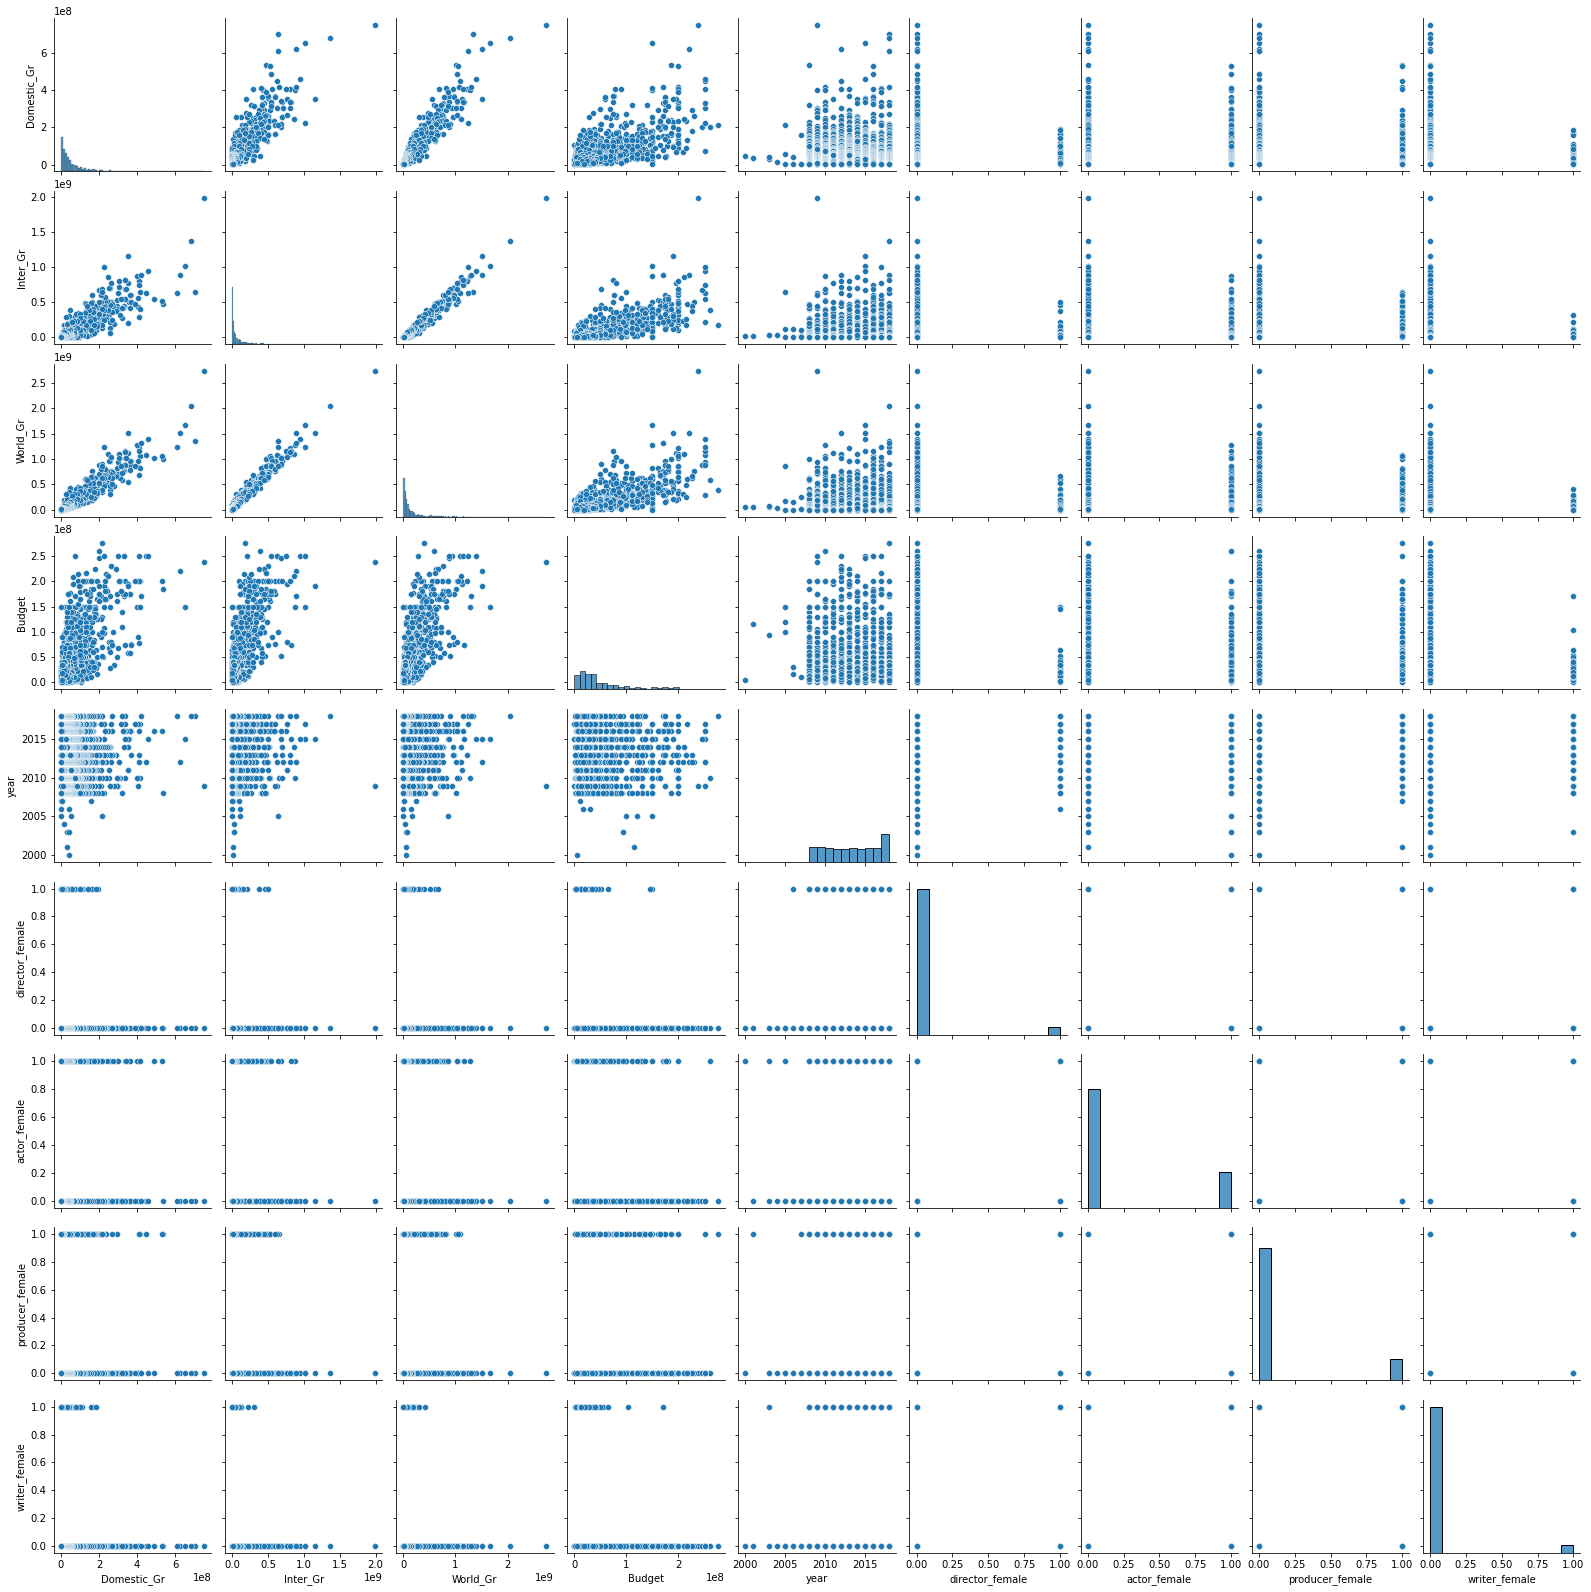

In [179]:
sns.pairplot(df2)
##Am I Missing a Few? 

In [112]:
dfmod = df2[['Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date', 'Opn_Gr',
       'Genre', 'WidestRelase', 'Rating', 'year', 'name', 'country', 'runtime',
       'director', 'language', 'director_gender', 'starring', 'actor_gender',
       'producer', 'producer_gender', 'writer', 'writer_gender', 'released',
       'Theater_Num', 'Open_Num', 'director_female', 'actor_female',
       'producer_female', 'writer_female']]

In [180]:
df2.dtypes

Domestic_Gr             float64
Inter_Gr                float64
World_Gr                float64
Budget                  float64
Rel_Date                 object
Opn_Gr                   object
Genre                    object
WidestRelase             object
Length_Relase            object
Rating                   object
year                      int64
name                     object
country                  object
runtime                  object
director                 object
language                 object
director_gender          object
starring                 object
actor_gender             object
producer                 object
producer_gender          object
writer                   object
writer_gender            object
released                 object
Theater_Num              object
Len_in_Theater_weeks     object
Open_Num                 object
Length                   object
director_female           int64
actor_female              int64
producer_female           int64
writer_f

In [ ]:
## Need to Fix Theater Num, Open Num, and Run Time!

In [181]:
df2['Theater_Num'] = df2['Theater_Num'].astype(float, errors = 'raise')

In [182]:
df2['Open_Num'] = df2['Open_Num'].astype(float, errors = 'raise')

In [184]:
df2['Open_Num'] = df2['Open_Num'].astype(float, errors = 'raise')

In [185]:
df2['runtime'] = df2['runtime'].replace(['121 126'],'121')

In [186]:
df2['runtime'] = df2['runtime'].replace(['85 91'],'85')

In [187]:
df2['runtime'] = df2['runtime'].replace(['101     90'],'101')

In [188]:
df2['runtime'] = df2['runtime'].replace(['130 138'],'130')

In [189]:
df2['runtime'] = df2['runtime'].replace(['101    efn  There is contradictory info in various sources. Some including https://www.allmovie.com/movie/v341780 give the time as104'],'101')

In [190]:
df2['runtime'] = df2['runtime'].replace(['101 102'],'101')

In [191]:
df2['runtime'] = df2['runtime'].replace(["'''Theatrical cut:'''97    '''Unrated cut:'''107"],'97')

In [192]:
df2['runtime'] = df2['runtime'].replace(['123 129'],'123')

In [193]:
df2['runtime'] = df2['runtime'].replace(['111 119'],'111')

In [194]:
df2['runtime'] = df2['runtime'].replace(['97 103  extended cut'],'97')

In [195]:
df2['runtime'] = df2['runtime'].replace(['88 89  extended cut'],'88')

In [196]:
df2['runtime'] = df2['runtime'].replace(["94   '''UK version:'''98"],'94')

In [197]:
df2['runtime'] = df2['runtime'].replace(['187    Small168    Small'],'94')

In [198]:
df2['runtime'] = df2['runtime'].replace(['93 101'],'93')

In [199]:
df2['runtime'] = df2['runtime'].replace(['118 130'],'118')

In [200]:
df2['runtime'] = df2['runtime'].replace(['88 89'],'88')

In [205]:
df2['runtime'] = df2['runtime'].replace(['115 /123 /128'],'115')

In [203]:
df2['runtime'] = df2['runtime'].replace(["90    '''Unrated version:'''94"],'88')

In [207]:
df2['runtime'] = df2['runtime'].replace(['85 96'],'85')

In [209]:
df2['runtime'] = df2['runtime'].replace(['75 min'],'75')

In [210]:
df2['runtime'] = df2['runtime'].astype(float, errors = 'raise')

In [212]:
df2['Length'] = df2['Length'].astype(float, errors = 'raise')

In [213]:
df2.dtypes

Domestic_Gr             float64
Inter_Gr                float64
World_Gr                float64
Budget                  float64
Rel_Date                 object
Opn_Gr                   object
Genre                    object
WidestRelase             object
Length_Relase            object
Rating                   object
year                      int64
name                     object
country                  object
runtime                 float64
director                 object
language                 object
director_gender          object
starring                 object
actor_gender             object
producer                 object
producer_gender          object
writer                   object
writer_gender            object
released                 object
Theater_Num             float64
Len_in_Theater_weeks     object
Open_Num                float64
Length                  float64
director_female           int64
actor_female              int64
producer_female           int64
writer_f

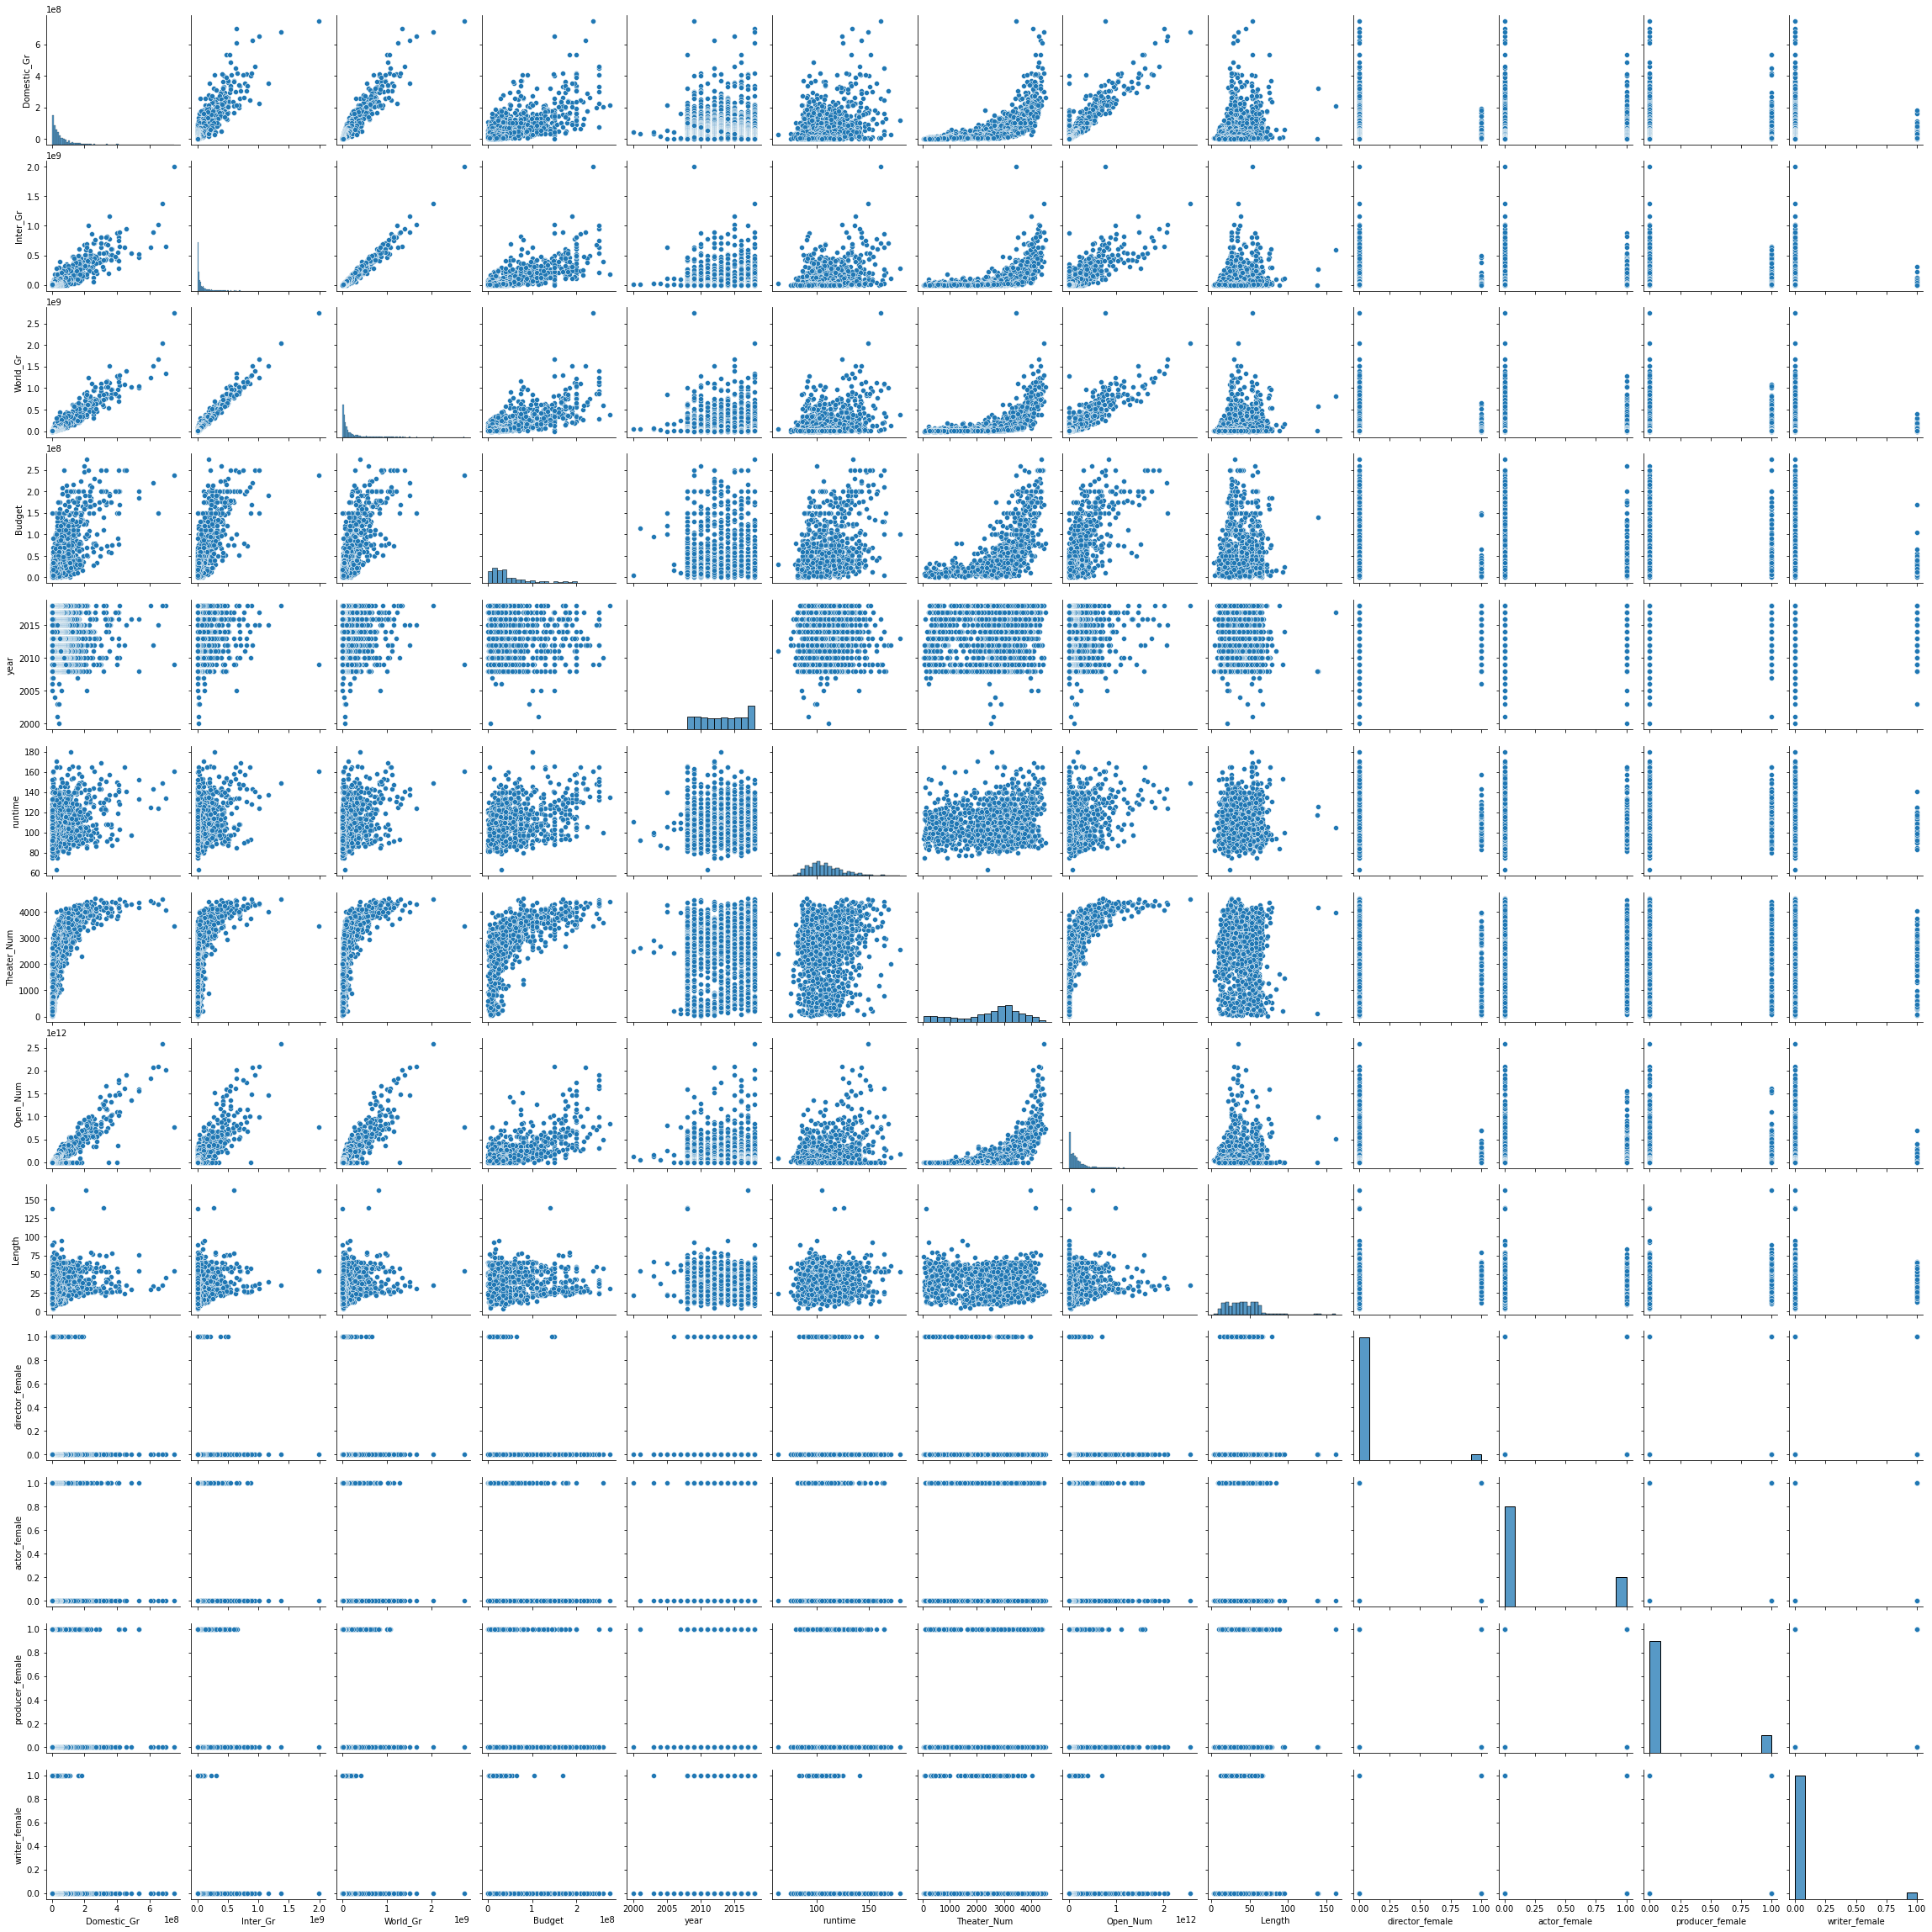

In [215]:
sns.pairplot(df2)

In [ ]:
#Binary Variables are Looking a little Odd, but that is to be expected. 

In [216]:
print(df2.shape)

(1503, 32)


In [217]:
df2.corr()

,Domestic_Gr,Inter_Gr,World_Gr,Budget,year,runtime,Theater_Num,Open_Num,Length,director_female,actor_female,producer_female,writer_female
Domestic_Gr,1.000000,0.867461,0.942039,0.659361,0.044176,0.311182,0.612110,0.914767,0.103209,-0.073004,-0.033533,0.003743,-0.074655
Inter_Gr,0.867461,1.000000,0.983845,0.734456,0.075052,0.322086,0.534228,0.808383,0.083086,-0.065419,-0.061097,-0.010619,-0.080178
World_Gr,0.942039,0.983845,1.000000,0.732477,0.067315,0.326749,0.577365,0.871205,0.092352,-0.069608,-0.052198,-0.006053,-0.079971
Budget,0.659361,0.734456,0.732477,1.000000,0.019814,0.360456,0.617873,0.676489,0.050396,-0.116302,-0.165767,0.017538,-0.110209
year,0.044176,0.075052,0.067315,0.019814,1.000000,0.107839,0.076203,0.047499,-0.049565,0.010709,0.062610,-0.005388,-0.012880
runtime,0.311182,0.322086,0.326749,0.360456,0.107839,1.000000,0.151619,0.277653,0.119565,-0.038130,-0.057733,-0.034639,-0.030996
Theater_Num,0.612110,0.534228,0.577365,0.617873,0.076203,0.151619,1.000000,0.625536,-0.018523,-0.106335,-0.071771,-0.073736,-0.092093
Open_Num,0.914767,0.808383,0.871205,0.676489,0.047499,0.277653,0.625536,1.000000,0.013490,-0.081238,-0.050107,-0.027089,-0.081802
Length,0.103209,0.083086,0.092352,0.050396,-0.049565,0.119565,-0.018523,0.013490,1.000000,0.006056,-0.021623,0.082013,-0.020256
director_female,-0.073004,-0.065419,-0.069608,-0.116302,0.010709,-0.038130,-0.106335,-0.081238,0.006056,1.000000,0.135989,0.084523,0.332015


In [415]:
#df2.loc[:, 'Profit']=df2['World_Gr']-df2['Budget']

<AxesSubplot:>

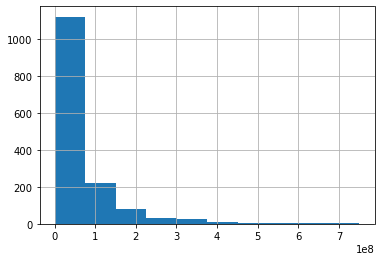

In [218]:
df2.Domestic_Gr.hist()
## My Brain Cannot Handle The Size of These Numbers... Let's Fix that

In [220]:
df2['Domestic_Gr'] = df2['Domestic_Gr'].apply(lambda x: x/1000000)
df2['Inter_Gr'] = df2['Inter_Gr'].apply(lambda x: x/1000000)
df2['World_Gr'] = df2['World_Gr'].apply(lambda x: x/1000000)
df2['Open_Num'] = df2['Open_Num'].apply(lambda x: x/1000000)
df2['Budget'] = df2['Budget'].apply(lambda x: x/1000000)

<AxesSubplot:>

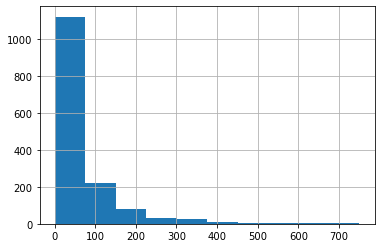

In [221]:
df2.Domestic_Gr.hist()

<AxesSubplot:>

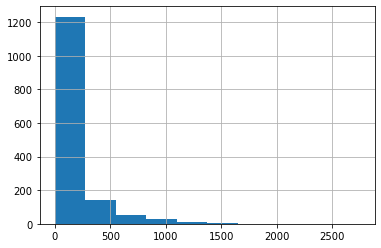

In [222]:
df2.World_Gr.hist()

<AxesSubplot:>

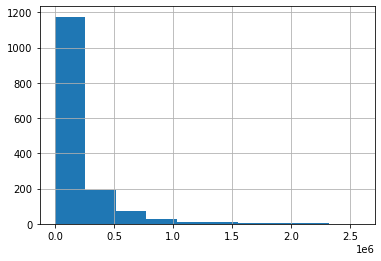

In [223]:
df2.Open_Num.hist()

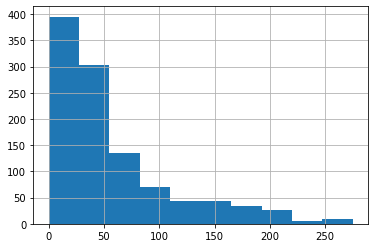

In [224]:
df2.Budget.hist();

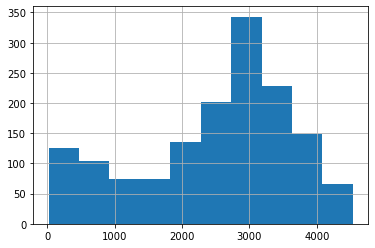

In [225]:
df2.Theater_Num.hist();

In [226]:
df2.head()

,Domestic_Gr,Inter_Gr,World_Gr,Budget,Rel_Date,Opn_Gr,Genre,WidestRelase,Length_Relase,Rating,...,writer_gender,released,Theater_Num,Len_in_Theater_weeks,Open_Num,Length,director_female,actor_female,producer_female,writer_female
Title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight,533.345358,469.700000,1003.045358,185.0,"Jul 18, 2008\n -\n Mar 5...","$158,411,4834,366\n theaters",Action\n \n Crime\n \n Dra...,"4,366 theaters",532 days/76 weeks,PG-13,...,unknown,2008/07/14,4366.0,76 weeks,1.584115e+06,76.0,0,0,1,0
Iron Man,318.604126,266.762121,585.366247,140.0,"May 2, 2008\n -\n Oct 2,...","$98,618,6684,105\n theaters",Action\n \n Adventure\n \n ...,"4,154 theaters",974 days/139 weeks,PG-13,...,unknown,2008/4/14,4154.0,139 weeks,9.861867e+05,139.0,0,0,0,0
Hancock,227.946274,401.497154,629.443428,150.0,"Jul 2, 2008\n -\n Sep 7,...","$62,603,8793,965\n theaters",Action\n \n Drama\n \n Fan...,"3,965 theaters",183 days/26 weeks,PG-13,...,male,2008/06/16,3965.0,26 weeks,6.260388e+05,26.0,0,0,0,0
Kung Fu Panda,215.434591,416.309969,631.744560,130.0,"Jun 6, 2008\n -\n Oct 9,...","$60,239,1304,114\n theaters",Action\n \n Adventure\n \n ...,"4,136 theaters",209 days/29 weeks,PG,...,unknown,2008/5/15,4136.0,29 weeks,6.023913e+05,29.0,0,0,1,0
Twilight,192.769854,214.417861,407.187715,37.0,"Nov 21, 2008\n -\n Apr 2...","$69,637,7403,419\n theaters",Drama\n \n Fantasy\n \n Ro...,"3,649 theaters",413 days/59 weeks,PG-13,...,unknown,2008/11/17,3649.0,59 weeks,6.963774e+05,59.0,1,1,0,0


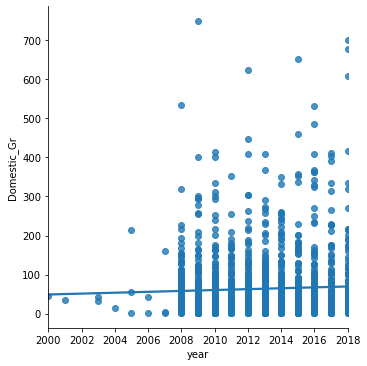

In [233]:
sns.lmplot(x ="year", y ="Domestic_Gr", data = df2, order = 1, ci = None) 

array([[<AxesSubplot:title={'center':'log_Budget'}>]], dtype=object)

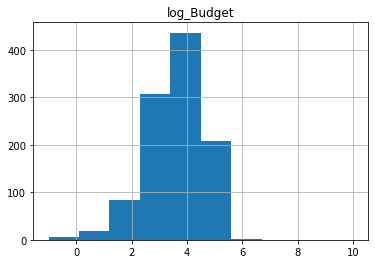

In [248]:
df2['log_Budget'] = np.log(df2['Budget'])

df2.hist('log_Budget',range=[-1, 10])

array([[<AxesSubplot:title={'center':'log_Theater_Num'}>]], dtype=object)

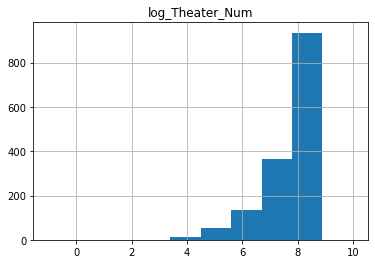

In [244]:
df2['log_Theater_Num'] = np.log(df2['Theater_Num'])

df2.hist('log_Theater_Num',range=[-1, 10])

array([[<AxesSubplot:title={'center':'actor_female'}>]], dtype=object)

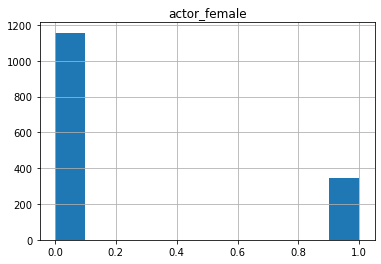

In [544]:
df2.hist('actor_female')

array([[<AxesSubplot:title={'center':'producer_female'}>]], dtype=object)

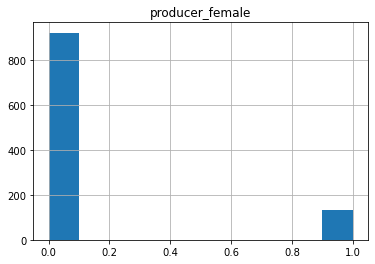

In [568]:
dfclear.hist('producer_female')

array([[<AxesSubplot:title={'center':'writer_female'}>]], dtype=object)

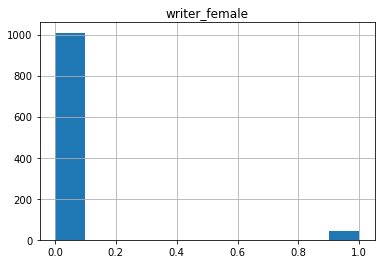

In [566]:
dfclear.hist('writer_female')

array([[<AxesSubplot:title={'center':'director_female'}>]], dtype=object)

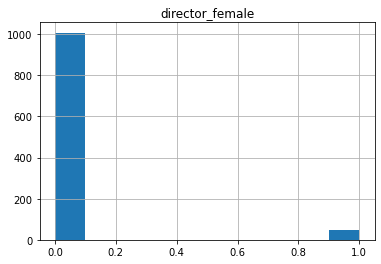

In [565]:
dfclear.hist('director_female')

In [417]:
print(dfclear.shape)

(1053, 38)


In [230]:
#Datasetsave just in case
df2.to_csv('dffinalnew.csv')

In [499]:
dfnum=dfnum.fillna(0)

In [501]:
dfnum.columns

Index(['Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'year', 'runtime',
       'Theater_Num', 'Open_Num', 'Length', 'director_female', 'actor_female',
       'producer_female', 'writer_female', 'log_Theater_Num', 'log_Budget',
       'predict', 'resid', 'log_Inter_Gr', 'log_Open_Num', 'log_World_Gr',
       'log_runtime', 'Theater_Num_Sq', 'log_Domestic_Gr'],
      dtype='object')

In [515]:
dfnum.to_csv('dfnum.csv')

In [502]:
print(dfnum.shape)

(1053, 23)


In [504]:
dfnum.dtypes

Domestic_Gr        float64
Inter_Gr           float64
World_Gr           float64
Budget             float64
year                 int64
runtime            float64
Theater_Num        float64
Open_Num           float64
Length             float64
director_female      int64
actor_female         int64
producer_female      int64
writer_female        int64
log_Theater_Num    float64
log_Budget         float64
predict            float64
resid              float64
log_Inter_Gr       float64
log_Open_Num       float64
log_World_Gr       float64
log_runtime        float64
Theater_Num_Sq     float64
log_Domestic_Gr    float64
dtype: object

In [507]:
dfnum.head()

,Domestic_Gr,Inter_Gr,World_Gr,Budget,year,runtime,Theater_Num,Open_Num,Length,director_female,...,log_Theater_Num,log_Budget,predict,resid,log_Inter_Gr,log_Open_Num,log_World_Gr,log_runtime,Theater_Num_Sq,log_Domestic_Gr
Title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight,533.345358,469.700000,1003.045358,185.0,2008,152.0,4366.0,1.584115,76.0,0,...,8.381603,5.220356,7.178888,-0.899719,6.152094,14.275536,6.910796,5.023881,19061956.0,6.279169
Iron Man,318.604126,266.762121,585.366247,140.0,2008,126.0,4154.0,0.986187,139.0,0,...,8.331827,4.941642,6.825805,-1.061855,5.586357,13.801601,6.372238,4.836282,17255716.0,5.763949
Hancock,227.946274,401.497154,629.443428,150.0,2008,92.0,3965.0,0.626039,26.0,0,...,8.285261,5.010635,5.109140,0.319970,5.995200,13.347168,6.444836,4.521789,15721225.0,5.429110
Kung Fu Panda,215.434591,416.309969,631.744560,130.0,2008,92.0,4136.0,0.602391,29.0,0,...,8.327484,4.867534,5.314976,0.057681,6.031430,13.308663,6.448485,4.521789,17106496.0,5.372657
Twilight,192.769854,214.417861,407.187715,37.0,2008,121.0,3649.0,0.696377,59.0,1,...,8.202208,3.610918,5.266896,-0.005399,5.367927,13.453647,6.009274,4.795791,13315201.0,5.261497


In [506]:
dfnum['Open_Num'] = dfnum['Open_Num'].apply(lambda x: x/1000000)

In [490]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfnum = dfclear.select_dtypes(include=numerics)

In [623]:
X = dfnum.drop(columns=['Domestic_Gr','runtime','Theater_Num','actor_female','writer_female','director_female','log_runtime','World_Gr',"Theater_Num_Sq","log_Inter_Gr","log_Open_Num","log_Theater_Num","log_Budget",'year',"log_World_Gr","predict","resid","log_Domestic_Gr"])
y = dfnum['Domestic_Gr']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

In [624]:
X.columns

Index(['Inter_Gr', 'Budget', 'Open_Num', 'Length', 'producer_female'], dtype='object')

In [625]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lr = model.fit(X_train,y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_test = lr.score(X_test, y_test)
print(r_squared_train)
print(r_squared_test)

0.8624789434939415
0.8718353997907384


In [628]:
X = dfnum.drop(columns=['Domestic_Gr','runtime','Inter_Gr','Theater_Num','writer_female','director_female','log_runtime','World_Gr',"Theater_Num_Sq","log_Inter_Gr","log_Open_Num","log_Theater_Num","log_Budget",'year',"log_World_Gr","predict","resid","log_Domestic_Gr"])
y = dfnum['Domestic_Gr']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)

In [629]:
X.columns

Index(['Budget', 'Open_Num', 'Length', 'actor_female', 'producer_female'], dtype='object')

In [630]:
## Older 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lr = model.fit(X_train,y_train)

r_squared_train = lr.score(X_train, y_train)
r_squared_test = lr.score(X_test, y_test)
print(r_squared_train)
print(r_squared_test)

0.8362516820751223
0.759985840473083


In [529]:
lr.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [231]:
print(df2.shape)

(1503, 32)


In [232]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [583]:
## Remembered scikitlearnmight be better
ols1 = smf.ols('Domestic_Gr~ Theater_Num + Inter_Gr + Length + Open_Num + Budget + runtime +director_female + actor_female + producer_female + writer_female', data=df2)
fit1 = ols1.fit()
fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Domestic_Gr   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     725.1
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:11:42   Log-Likelihood:                -5099.9
No. Observations:                1053   AIC:                         1.022e+04
Df Residuals:                    1042   BIC:                         1.028e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -44.7186      7.960     -5.618      0.000     -60.337     -29.100
Theater_Num         0.0081      0.001      5.660      0.000       0.005       0.011
Inter_Gr            0.2161      0.010     21.076      0.000       0.196       0.236
Length              0.3989      0.056      7.071      0.000       0.288       0.510
Open_Num            0.0002      6e-06     29.672      0.000       0.000       0.000
Budget             -0.1665      0.030     -5.606      0.000      -0.225      -0.108
runtime             0.2348      0.063      3.755      0.000       0.112       0.357
director_female    -4.0463      4.860     -0.832      0.405     -13.584       5.491
actor_female        2.6214      2.410      1.088      0.277      -2.109       7.351
producer_female     9.4692      2.923      3.240      0.001       3.734      15.205
writer_female       1.4884      4.977      0.299      0.765      -8.278      11.254
==============================================================================
Omnibus:                      531.985   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10031.205
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      17.651   Cond. No.                     3.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [635]:
## Okay WAIT.... sould we drop all other Variables but the "Producer Female" Variable?
olsTheaternum = smf.ols(' Theater_Num ~  Length + Open_Num + Budget + runtime  + actor_female', data=dfclear)
fit1 = olsTheaternum .fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Theater_Num   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          5.30e-144
Time:                        16:29:24   Log-Likelihood:                -8329.2
No. Observations:                1053   AIC:                         1.667e+04
Df Residuals:                    1047   BIC:                         1.670e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2868.4908    122.878     23.344      0.000    2627.375    3109.606
Length          -2.8837      1.191     -2.421      0.016      -5.221      -0.547
Open_Num         0.0012      0.000     12.437      0.000       0.001       0.001
Budget           6.6767      0.523     12.769      0.000       5.651       7.703
runtime         -5.3002      1.078     -4.917      0.000      -7.415      -3.185
actor_female    62.3742     50.256      1.241      0.215     -36.239     160.988
==============================================================================
Omnibus:                      230.088   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.100
Skew:                          -1.305   Prob(JB):                     6.64e-94
Kurtosis:                       4.722   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [650]:
## Okay WAIT.... sould we drop all other Variables but the "Producer Female" Variable?
ols = smf.ols('Domestic_Gr~  Length + Open_Num +Budget+Inter_Gr+producer_female ', data=dfclear)
fit2 = ols2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Domestic_Gr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:45:31   Log-Likelihood:                -5127.4
No. Observations:                1053   AIC:                         1.027e+04
Df Residuals:                    1047   BIC:                         1.030e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.9472      2.660     -0.732      0.464      -7.166       3.272
Length              0.4034      0.057      7.048      0.000       0.291       0.516
Open_Num            0.0002   5.78e-06     32.761      0.000       0.000       0.000
Budget             -0.0960      0.027     -3.532      0.000      -0.149      -0.043
Inter_Gr            0.2145      0.010     20.536      0.000       0.194       0.235
producer_female     8.6860      2.950      2.944      0.003       2.897      14.475
==============================================================================
Omnibus:                      565.471   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11257.481
Skew:                           2.018   Prob(JB):                         0.00
Kurtosis:                      18.501   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [649]:
##Let's Take a little look see at VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = dfclear[['Inter_Gr','Length','Open_Num', 'Budget', 'producer_female']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0         Inter_Gr  4.470611
1           Length  2.004629
2         Open_Num  4.499733
3           Budget  4.521843
4  producer_female  1.145355


In [588]:
X = dfclear[[ 'Theater_Num', "Inter_Gr",'Length' , 'Open_Num' , 'Budget' , 'runtime', 'director_female','writer_female','producer_female','actor_female']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature        VIF
0      Theater_Num  13.854880
1         Inter_Gr   4.643573
2           Length   5.760708
3         Open_Num   5.099832
4           Budget   5.646426
5          runtime  12.601932
6  director_female   1.177477
7    writer_female   1.184299
8  producer_female   1.178359
9     actor_female   1.388489


In [652]:
dfclear.dtypes

Domestic_Gr             float64
Inter_Gr                float64
World_Gr                float64
Budget                  float64
Rel_Date                 object
Opn_Gr                   object
Genre                    object
WidestRelase             object
Length_Relase            object
Rating                   object
year                      int64
name                     object
country                  object
runtime                 float64
director                 object
language                 object
director_gender          object
starring                 object
actor_gender             object
producer                 object
producer_gender          object
writer                   object
writer_gender            object
released                 object
Theater_Num             float64
Len_in_Theater_weeks     object
Open_Num                float64
Length                  float64
director_female           int64
actor_female              int64
producer_female           int64
writer_f

In [582]:
## Let's Try the Log of Buget!
ols3 = smf.ols('Domestic_Gr~ Length + Open_Num + Budget + actor_female+ producer_female ', data=df2)
fit3 = ols3.fit()
fit3.summary()
## Less Good, Still feeling better about 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Domestic_Gr   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     937.6
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:44:16   Log-Likelihood:                -5349.0
No. Observations:                1063   AIC:                         1.071e+04
Df Residuals:                    1057   BIC:                         1.074e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -13.9719      3.156     -4.427      0.000     -20.165      -7.779
Length              0.5027      0.067      7.516      0.000       0.371       0.634
Open_Num            0.0003   5.62e-06     45.572      0.000       0.000       0.000
Budget              0.1681      0.029      5.788      0.000       0.111       0.225
actor_female        6.0026      2.823      2.126      0.034       0.463      11.542
producer_female     7.2670      3.469      2.095      0.036       0.460      14.075
==============================================================================
Omnibus:                     1131.823   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108655.943
Skew:                           4.943   Prob(JB):                         0.00
Kurtosis:                      51.533   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
dfclear=df2.fillna(0)

In [263]:
dfclear=dfclear[dfclear.Budget != 0.0]
dfclear=dfclear[dfclear.Domestic_Gr != 0.0]
dfclear=dfclear[dfclear.Open_Num!= 0.0]
dfclear=dfclear[dfclear.Inter_Gr!= 0.0]
dfclear=dfclear[dfclear.World_Gr != 0.0]

In [ ]:
#Ugh- some issues with VIF Here- let's drop Theater Num and runtime and see what happens

In [287]:
#Phew! Better! Let's Re-Run the Model and See effects

In [664]:
from sklearn.metrics import mean_squared_error

In [665]:
print('RSME: ',np.sqrt(mean_squared_error(y_test,test_pred))) 

RSME:  51.91282618755574


In [ ]:
df2.dtypes

In [653]:
ols2 = smf.ols('Domestic_Gr~   Inter_Gr + Length + Open_Num + Budget + producer_female', data=dfclear)
fit2 = ols2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Domestic_Gr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:03:01   Log-Likelihood:                -5127.4
No. Observations:                1053   AIC:                         1.027e+04
Df Residuals:                    1047   BIC:                         1.030e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.9472      2.660     -0.732      0.464      -7.166       3.272
Inter_Gr            0.2145      0.010     20.536      0.000       0.194       0.235
Length              0.4034      0.057      7.048      0.000       0.291       0.516
Open_Num            0.0002   5.78e-06     32.761      0.000       0.000       0.000
Budget             -0.0960      0.027     -3.532      0.000      -0.149      -0.043
producer_female     8.6860      2.950      2.944      0.003       2.897      14.475
==============================================================================
Omnibus:                      565.471   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11257.481
Skew:                           2.018   Prob(JB):                         0.00
Kurtosis:                      18.501   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [654]:
X = dfclear[[ 'Inter_Gr' , 'Length' , 'Open_Num' , 'Budget' , 'producer_female']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0         Inter_Gr  4.470611
1           Length  2.004629
2         Open_Num  4.499733
3           Budget  4.521843
4  producer_female  1.145355


In [657]:
test_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Predicted vs Actual Domestic Gross Revenue for American Made Movies 2009-2018(Millions)')

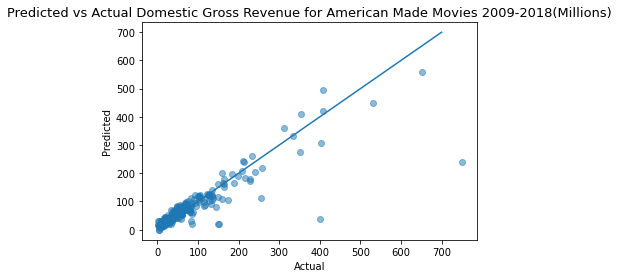

In [663]:
plt.scatter(y_test, test_pred, alpha=.5)
plt.plot(np.linspace(0,700,100), np.linspace(0,700,100))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Domestic Gross Revenue for American Made Movies 2009-2018(Millions)", fontsize=13)



In [ ]:
#Might be Good to take a look at Residuals as well before Cross Validation 

In [ ]:
##Impact on Model was Minimal

Text(0.5, 0, 'Prediction')

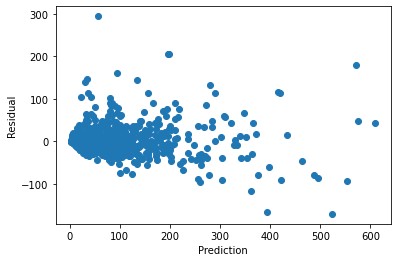

In [644]:
import matplotlib.pyplot as plt
plot = plt.scatter(fit2.predict(), fit2.resid)
plot.axes.set_ylabel('Residual')
plot.axes.set_xlabel('Prediction')   

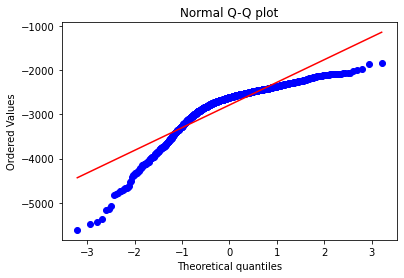

In [645]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(dfclear['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
#Well... There it is, Heteroskedacity. Let's Confirm

In [398]:
from statsmodels.stats.diagnostic import het_white


white_test = het_white(fit2.resid, fit2.model.exog)

In [401]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 26.277479757434918, 'LM-Test p-value': 0.0009413918298756676, 'F-Statistic': 3.339958986713462, 'F-Test p-value': 0.0008761774509534347}


In [ ]:
#confirmed 

In [ ]:
dfsmaller = dfclear[['Theater_Num','Inter_Gr','Length','Open_Num', 'Budget', 'producer_female']]

In [264]:
print(dfclear.shape)

(1053, 34)


In [ ]:
## P Values Look GREAT! And No Major Change to the R or Adjusted R^2 Statistic 

In [477]:
dfclear.columns

Index(['Domestic_Gr', 'Inter_Gr', 'World_Gr', 'Budget', 'Rel_Date', 'Opn_Gr',
       'Genre', 'WidestRelase', 'Length_Relase', 'Rating', 'year', 'name',
       'country', 'runtime', 'director', 'language', 'director_gender',
       'starring', 'actor_gender', 'producer', 'producer_gender', 'writer',
       'writer_gender', 'released', 'Theater_Num', 'Len_in_Theater_weeks',
       'Open_Num', 'Length', 'director_female', 'actor_female',
       'producer_female', 'writer_female', 'log_Theater_Num', 'log_Budget',
       'predict', 'resid', 'log_Inter_Gr', 'log_Open_Num', 'log_World_Gr',
       'log_runtime', 'Theater_Num_Sq', 'log_Domestic_Gr'],
      dtype='object')

In [311]:
dfclear['log_Inter_Gr'] = np.log(dfclear['Inter_Gr'])

In [323]:
dfclear['log_Open_Num'] = np.log(dfclear['Open_Num'])

In [419]:
dfclear['log_World_Gr'] = np.log(dfclear['World_Gr'])

In [476]:
dfclear['log_Domestic_Gr'] = np.log(dfclear['Domestic_Gr'])

In [467]:
dfclear['Theater_Num_Sq'] = dfclear['Theater_Num']*dfclear['Theater_Num']

In [488]:
ols2 = smf.ols('log_Domestic_Gr~ Length+Budget +Open_Num+ actor_female ', data=dfclear)
fit2 = ols2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_Domestic_Gr   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     348.8
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          7.02e-191
Time:                        08:54:18   Log-Likelihood:                -1148.7
No. Observations:                1053   AIC:                             2307.
Df Residuals:                    1048   BIC:                             2332.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.6758      0.062     43.441      0.000       2.555       2.797
Length           0.0084      0.001      6.472      0.000       0.006       0.011
Budget           0.0045      0.001      7.898      0.000       0.003       0.006
Open_Num      2.281e-06   1.09e-07     20.899      0.000    2.07e-06     2.5e-06
actor_female     0.1489      0.055      2.717      0.007       0.041       0.256
==============================================================================
Omnibus:                      210.731   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.594
Skew:                          -1.102   Prob(JB):                    6.48e-103
Kurtosis:                       5.422   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [589]:
X = dfclear[[ 'Length' ,'Budget','actor_female',"producer_female",'Open_Num']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0           Length  2.206347
1           Budget  3.785082
2     actor_female  1.262689
3  producer_female  1.162903
4         Open_Num  3.162333


Text(0.5, 0, 'Prediction')

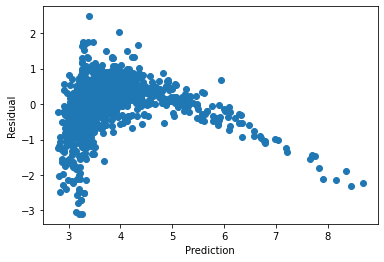

In [489]:
Log_Domestic Gross
import matplotlib.pyplot as plt
plot = plt.scatter(fit2.predict(), fit2.resid)
plot.axes.set_ylabel('Residual')
plot.axes.set_xlabel('Prediction')  

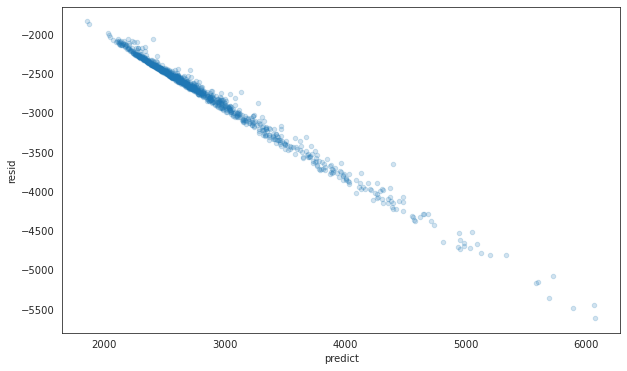

In [636]:
dfclear['predict']=fit2.predict()
dfclear['resid']=dfclear['Domestic_Gr']-dfclear['predict']
with sns.axes_style('white'):
    plot=dfclear.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
#### Code From METIS Data Science Exercise 

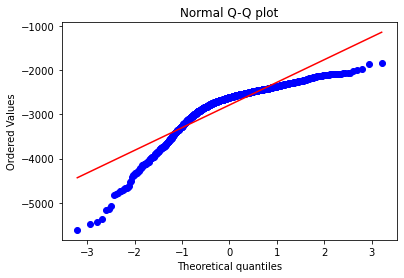

In [637]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(dfclear['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [433]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(fit2.resid,  fit2.model.exog)


AssertionError: 

In [434]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 26.277479757434918, 'LM-Test p-value': 0.0009413918298756676, 'F-Statistic': 3.339958986713462, 'F-Test p-value': 0.0008761774509534347}


In [358]:
dfclear.to_csv('dfclear.csv')

In [359]:
print(dfclear.shape)

(1053, 38)


In [651]:
dfclear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1053 entries, The Dark Knight to Action Point
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Domestic_Gr           1053 non-null   float64
 1   Inter_Gr              1053 non-null   float64
 2   World_Gr              1053 non-null   float64
 3   Budget                1053 non-null   float64
 4   Rel_Date              1053 non-null   object 
 5   Opn_Gr                1053 non-null   object 
 6   Genre                 1053 non-null   object 
 7   WidestRelase          1053 non-null   object 
 8   Length_Relase         1053 non-null   object 
 9   Rating                1053 non-null   object 
 10  year                  1053 non-null   int64  
 11  name                  1053 non-null   object 
 12  country               1053 non-null   object 
 13  runtime               1053 non-null   float64
 14  director              1053 non-null   object 
 15  lang